In [2]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # более красивый внешний вид графиков по умолчанию

In [3]:
df = pd.read_csv("stud_math.xls")
df.describe()
# Список пропущенных значений для колонок
df.isnull().sum().sort_values(ascending=False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famsize                27
famrel                 27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
age                     0
sex                     0
school                  0
dtype: int64

In [4]:
# Заменяем пустые значения на среднее(для колонок с числовыми значениями)
def fillna_mean(x):
    df[x] = df[x].fillna(df[x].mean())
    return(df[x].isnull().sum())


for i in ("absences", "health", "goout", "famrel", "failures",
          "studytime", "traveltime", "Fedu", "Medu", "freetime"):
    fillna_mean(i)

In [5]:
# Заменяем пустые значения на моду(для колонок с не числовыми значениями)
def fillna_mode(y):
    df[y] = df[y].fillna(df[y].mode().iloc[0])
    return(df[y].isnull().sum())


for o in ("paid", "romantic", "internet", "higher", "nursery",
          "activities", "famsup", "schoolsup", "guardian", "reason",
          "Fjob", "Mjob", "Pstatus", "famsize", "address"):
    fillna_mode(o)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,388.000000,395.000000,395.000000,395.000000,395.000000,395.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.093938,2.159786,0.669060,0.834564,0.722090,2.526235,0.894941,0.979967,1.104509,1.369187,23.105096,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,3.937500,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.614555,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.337802,-3.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002614FC448B0>,
      dtype=object)

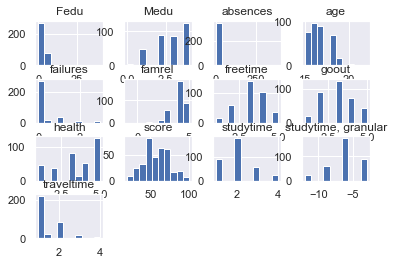

In [6]:
# Ищим выбросы
display(df.describe())
# Для колонки score пустые значения меняем на 0. Затем удаляем все строки со значениями 0,
# так как они нам не нужны
df.score = df.score.fillna(0)
df = df.loc[df.score > 0]
df.hist()

In [8]:
# Конвертируем колонку Fedu в числовой тип данных, после чего удаляем строки-выбросы из DataFrama
df.Fedu = df.Fedu.astype(np.int64)
df = df.loc[df.Fedu <= 4]

In [9]:
# Удаляем строку не нужную строку
del df["studytime, granular"]
# Удаляем выбросы из колонки famrel
df = df.loc[df.famrel > 0]

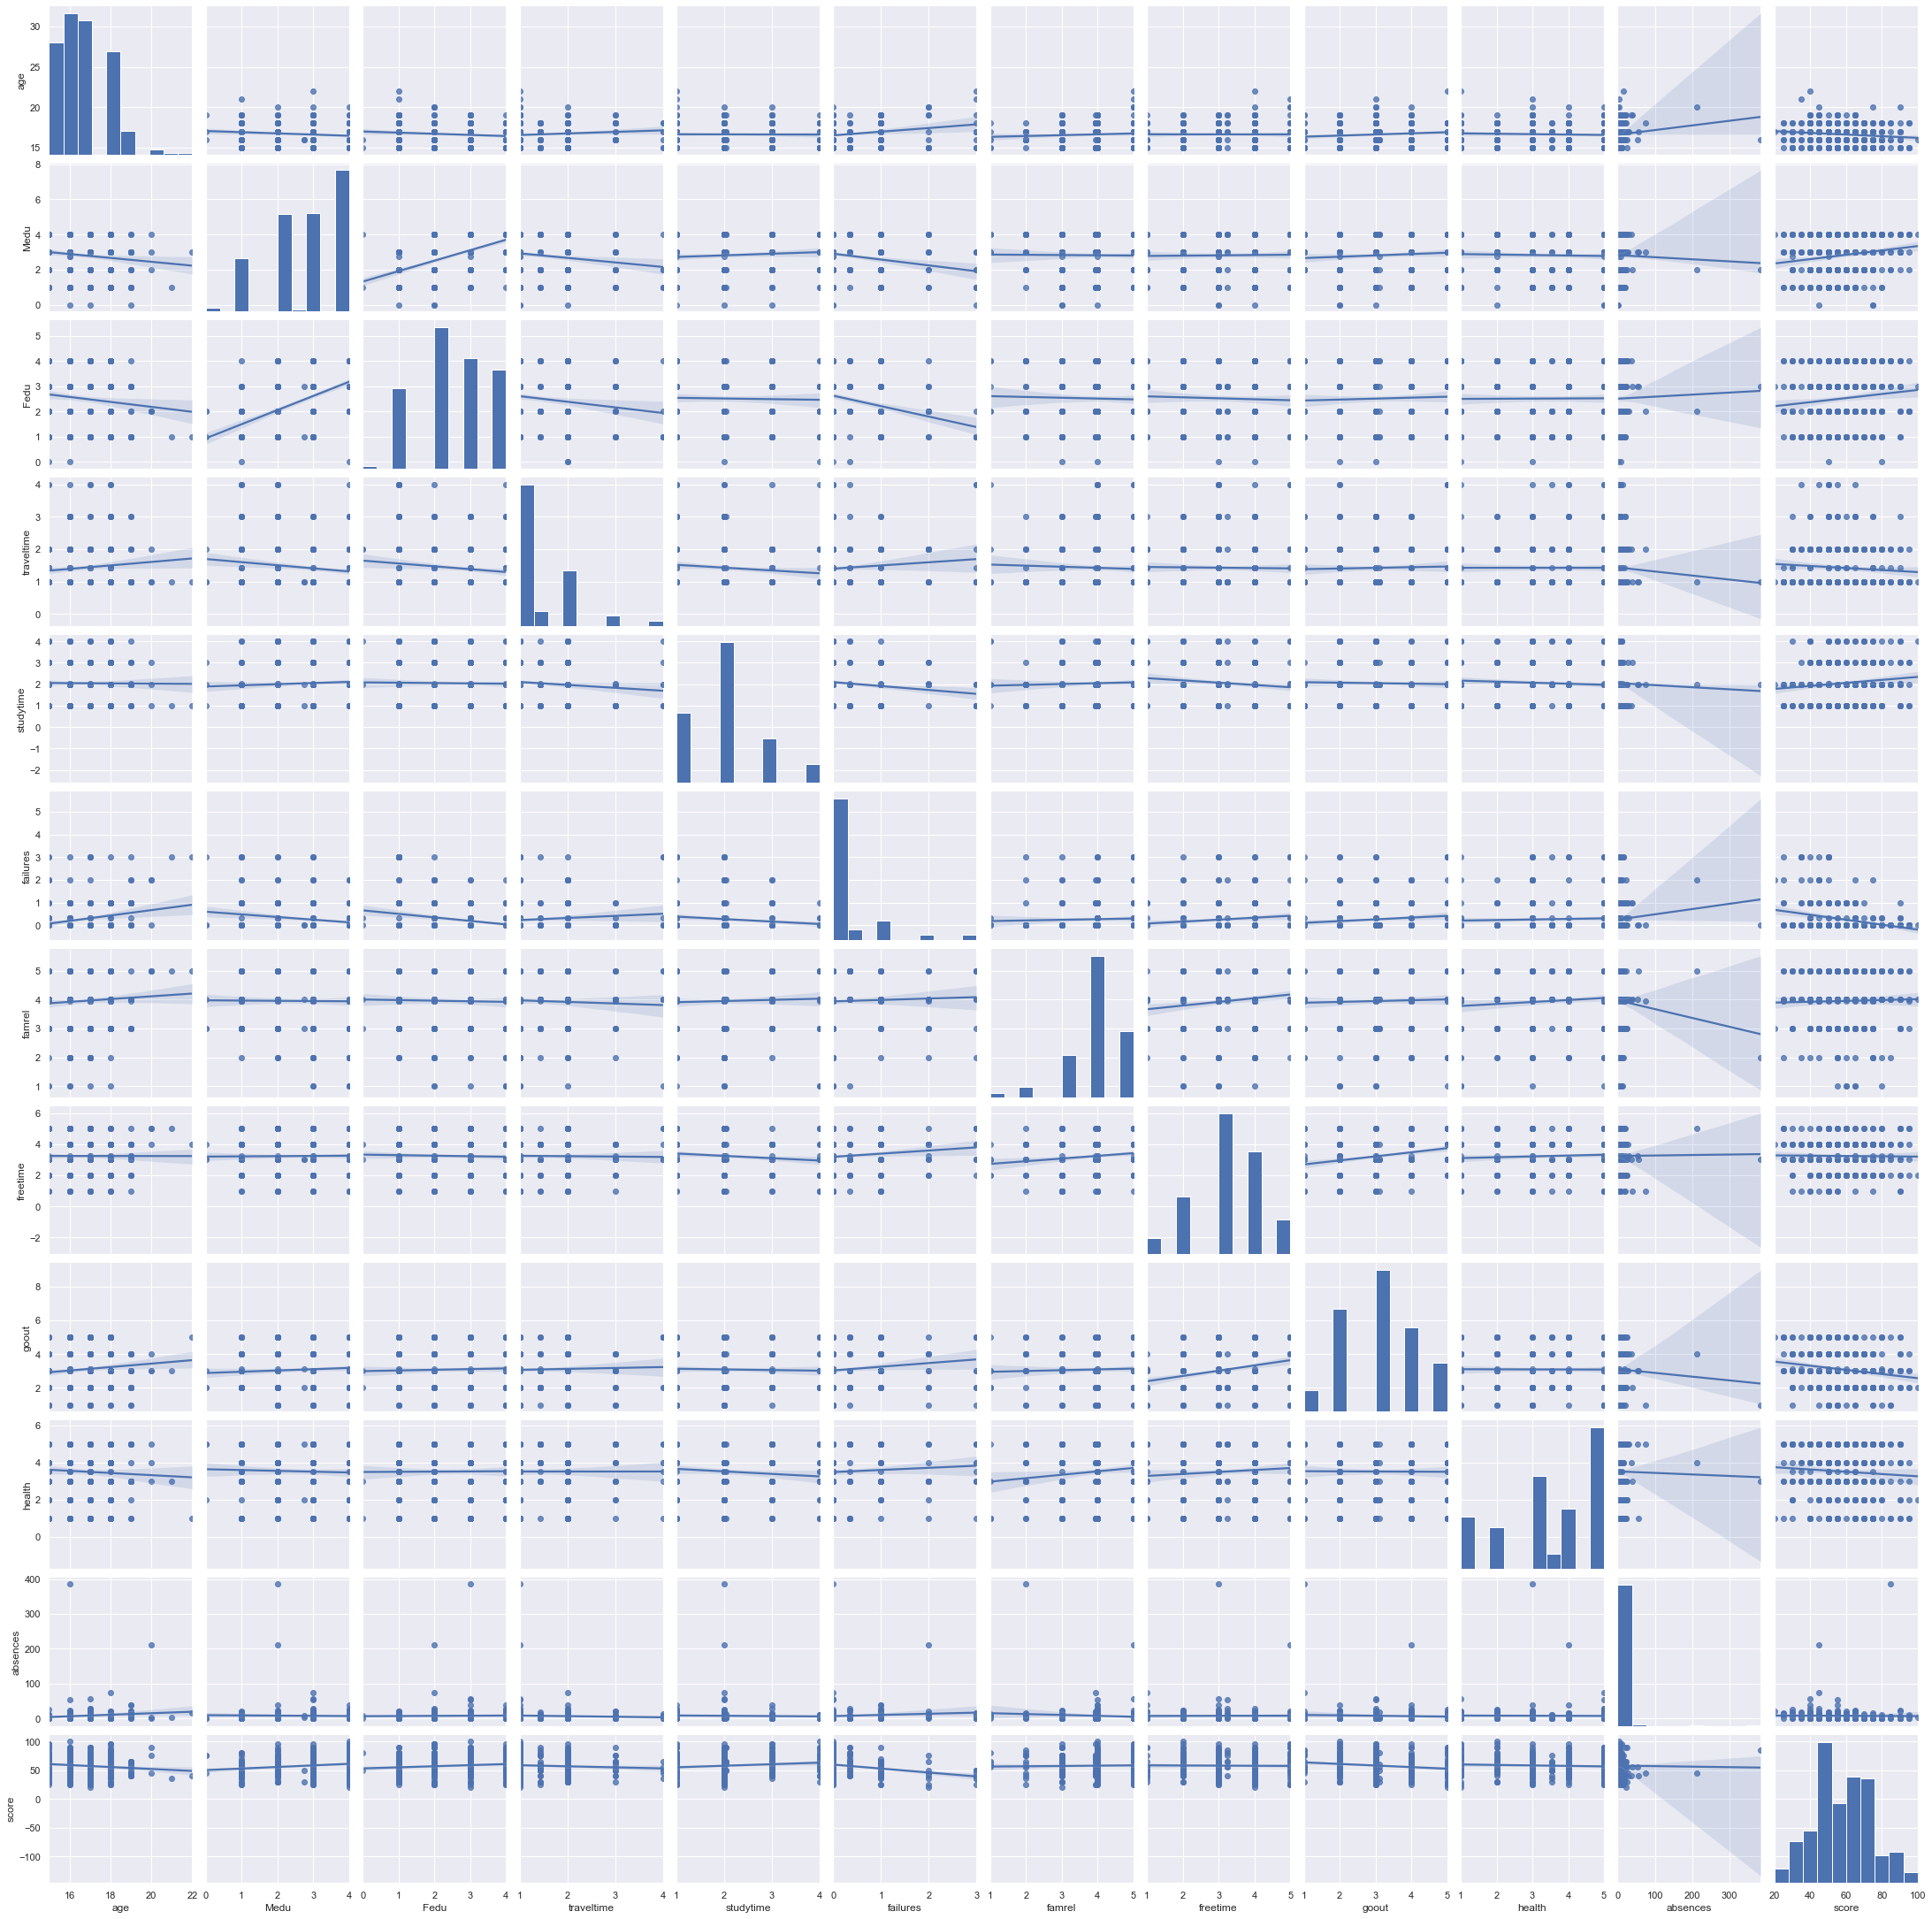

In [10]:
sns.pairplot(df, kind='reg')

In [11]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.127137,-0.117045,0.101437,-0.008940,0.231640,0.071088,-0.001743,0.118908,-0.053008,0.111616,-0.133221
Medu,-0.127137,1.000000,0.578056,-0.157297,0.070133,-0.196922,-0.010565,0.015574,0.075889,-0.034351,-0.026616,0.184552
Fedu,-0.117045,0.578056,1.000000,-0.140050,-0.020396,-0.252886,-0.025766,-0.036058,0.038921,0.007673,0.018648,0.123928
traveltime,0.101437,-0.157297,-0.140050,1.000000,-0.108765,0.094950,-0.042809,-0.016086,0.033438,0.000176,-0.045679,-0.076280
studytime,-0.008940,0.070133,-0.020396,-0.108765,1.000000,-0.140667,0.039490,-0.126411,-0.029713,-0.081012,-0.028575,0.136570
failures,0.231640,-0.196922,-0.252886,0.094950,-0.140667,1.000000,0.037266,0.131330,0.129521,0.053190,0.087734,-0.273873
famrel,0.071088,-0.010565,-0.025766,-0.042809,0.039490,0.037266,1.000000,0.148699,0.037457,0.112827,-0.087630,0.028494
freetime,-0.001743,0.015574,-0.036058,-0.016086,-0.126411,0.131330,0.148699,1.000000,0.285255,0.075776,0.007757,-0.015872
goout,0.118908,0.075889,0.038921,0.033438,-0.029713,0.129521,0.037457,0.285255,1.000000,-0.006091,-0.050134,-0.184158
health,-0.053008,-0.034351,0.007673,0.000176,-0.081012,0.053190,0.112827,0.075776,-0.006091,1.000000,-0.014422,-0.071566


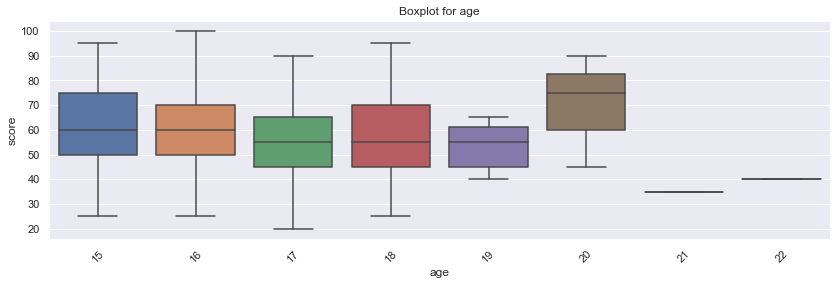

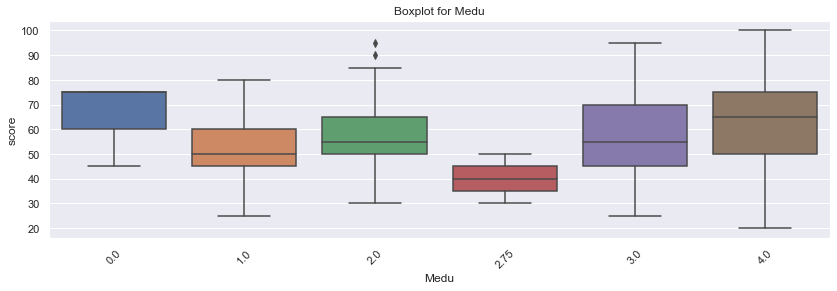

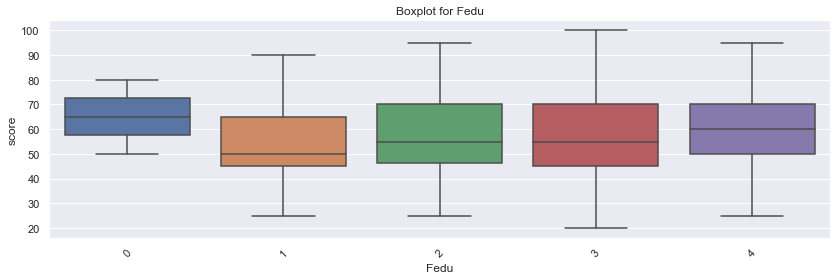

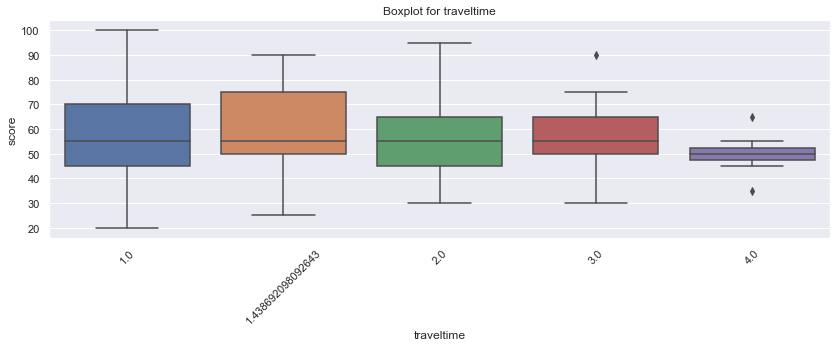

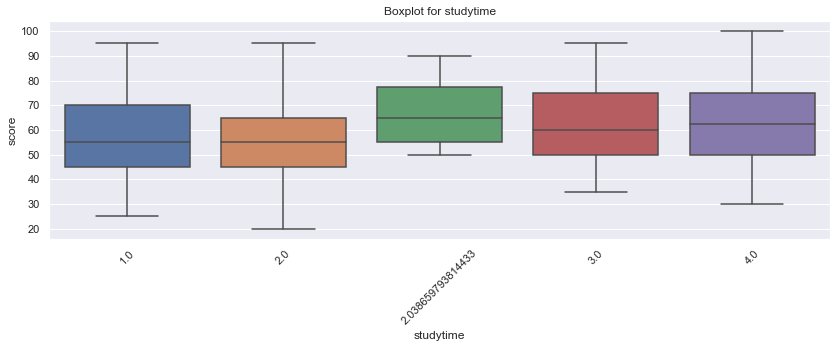

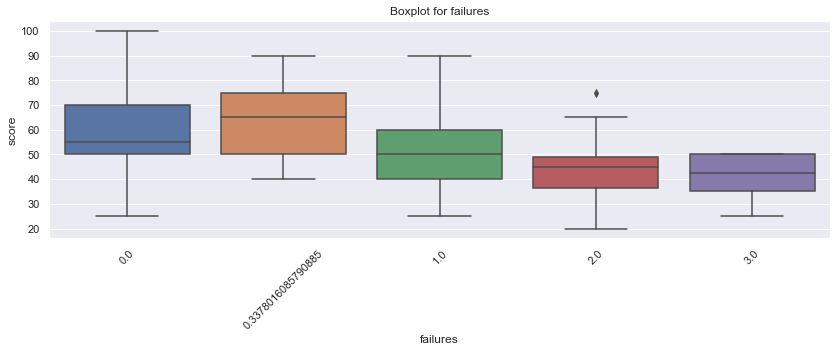

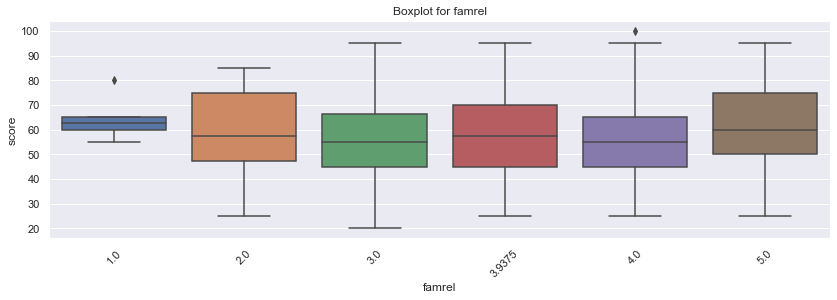

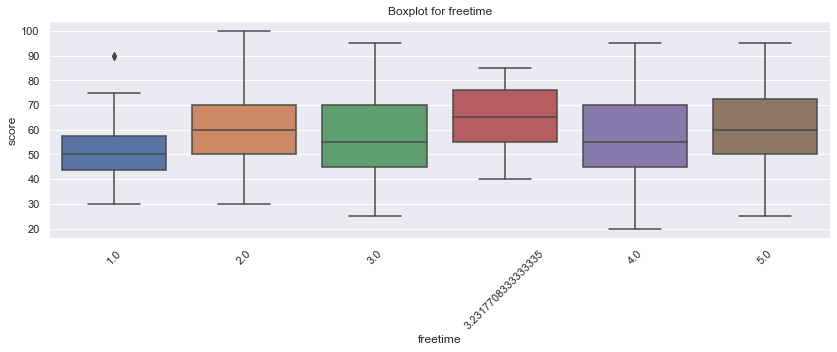

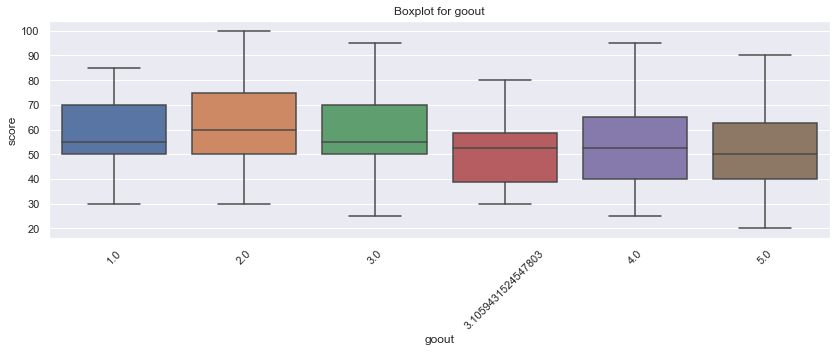

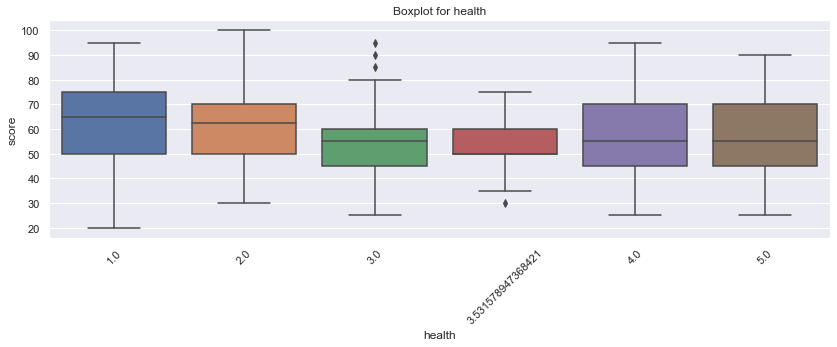

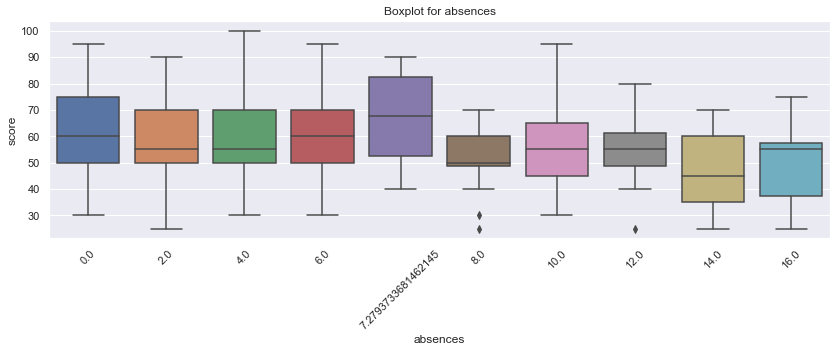

In [13]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Оставить эти значимые колонки для дальнейшего построения модели
for col in ["age", "Medu", "Fedu", "traveltime", "studytime",
            "failures", "famrel", "freetime", "goout", "health", "absences"]:
    get_boxplot(col)

In [14]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


# Оставить эти значимые колонки для дальнейшего построения модели
for col in ["age", "Medu", "Fedu", "traveltime", "studytime",
            "failures", "famrel", "freetime", "goout", "health", "absences"]:
    get_stat_dif(col)

D:\Program\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Program\Anaconda\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Program\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


In [15]:
df_for_model = df.loc[:, ["Medu", "Fedu", "studytime", "failures", "goout"]]
df_for_model.head()

,Medu,Fedu,studytime,failures,goout
0,4.0,4,2.0,0.0,4.0
1,1.0,1,2.0,0.0,3.0
2,1.0,1,2.0,3.0,2.0
3,4.0,2,3.0,0.0,2.0
4,3.0,3,2.0,0.0,2.0


In [ ]:
# Medu-качество данных хорошее, пропусков мало, выбросов нет.
# Fedu-качество данных не очень хорошее, пропусков много, выбросы есть.
# studytime-качество данных хорошее, пропусков мало, выбросов нет.
# failures-качество данных не очень хорошее, пропусков много, выбросов нет.
# goout - качество данных хорошее, пропусков мало, выбросов нет.